In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from keras.preprocessing.image import ImageDataGenerator
import cv2
import random
import numpy as np
import glob

size_ = 64

jenis = [
    4, 8, 16, 32
]

model = Sequential()

model.add(Conv2D(jenis[0], (3, 3), input_shape = (size_, size_, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(jenis[1], (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(jenis[2], (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(jenis[3], (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())

model.add(Dense(units = 22, activation = 'softmax'))

model.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentropy', metrics = ["accuracy"])

model.load_weights("pho_output_[4, 8, 16, 32].h5")

In [11]:
x = []
y = []

list_folder = glob.glob("pho_output/test/*")
for c, nama_folder in enumerate(list_folder):
    list_gambar = glob.glob(nama_folder+"/*.png")
    for nama_gambar in list_gambar:
        gambar = cv2.imread(nama_gambar)/255
        gambar = cv2.resize(gambar, (size_, size_))
        x.append(gambar)
        y.append(c)

x = np.array(x)
y = np.array(y)

In [12]:
dict_index_to_kelas = {0: 'B',
 1: 'D',
 2: 'G',
 3: 'H',
 4: 'H1',
 5: 'K',
 6: 'koma',
 7: 'L',
 8: 'M',
 9: 'N',
 10: 'P',
 11: 'petik',
 12: 'Q',
 13: 'R',
 14: 'S',
 15: 'S1',
 16: 'S2',
 17: 'T',
 18: 'T1',
 19: 'W',
 20: 'Y',
 21: 'Z'}

In [13]:
y_pred = model.predict(x)

22/22 [==============================] - 0s 7ms/step


In [14]:
y_pred = [np.argmax(_) for _ in y_pred]

In [15]:
from sklearn.metrics import classification_report

print (classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        31
           1       1.00      0.94      0.97        31
           2       0.94      1.00      0.97        31
           3       0.94      1.00      0.97        31
           4       1.00      0.97      0.98        31
           5       1.00      0.97      0.98        31
           6       1.00      1.00      1.00        31
           7       1.00      0.97      0.98        31
           8       1.00      0.97      0.98        31
           9       0.96      0.81      0.88        31
          10       0.94      1.00      0.97        31
          11       1.00      0.94      0.97        31
          12       1.00      0.94      0.97        31
          13       0.97      0.94      0.95        31
          14       1.00      1.00      1.00        31
          15       0.82      1.00      0.90        31
          16       0.97      1.00      0.98        31
          17       1.00    

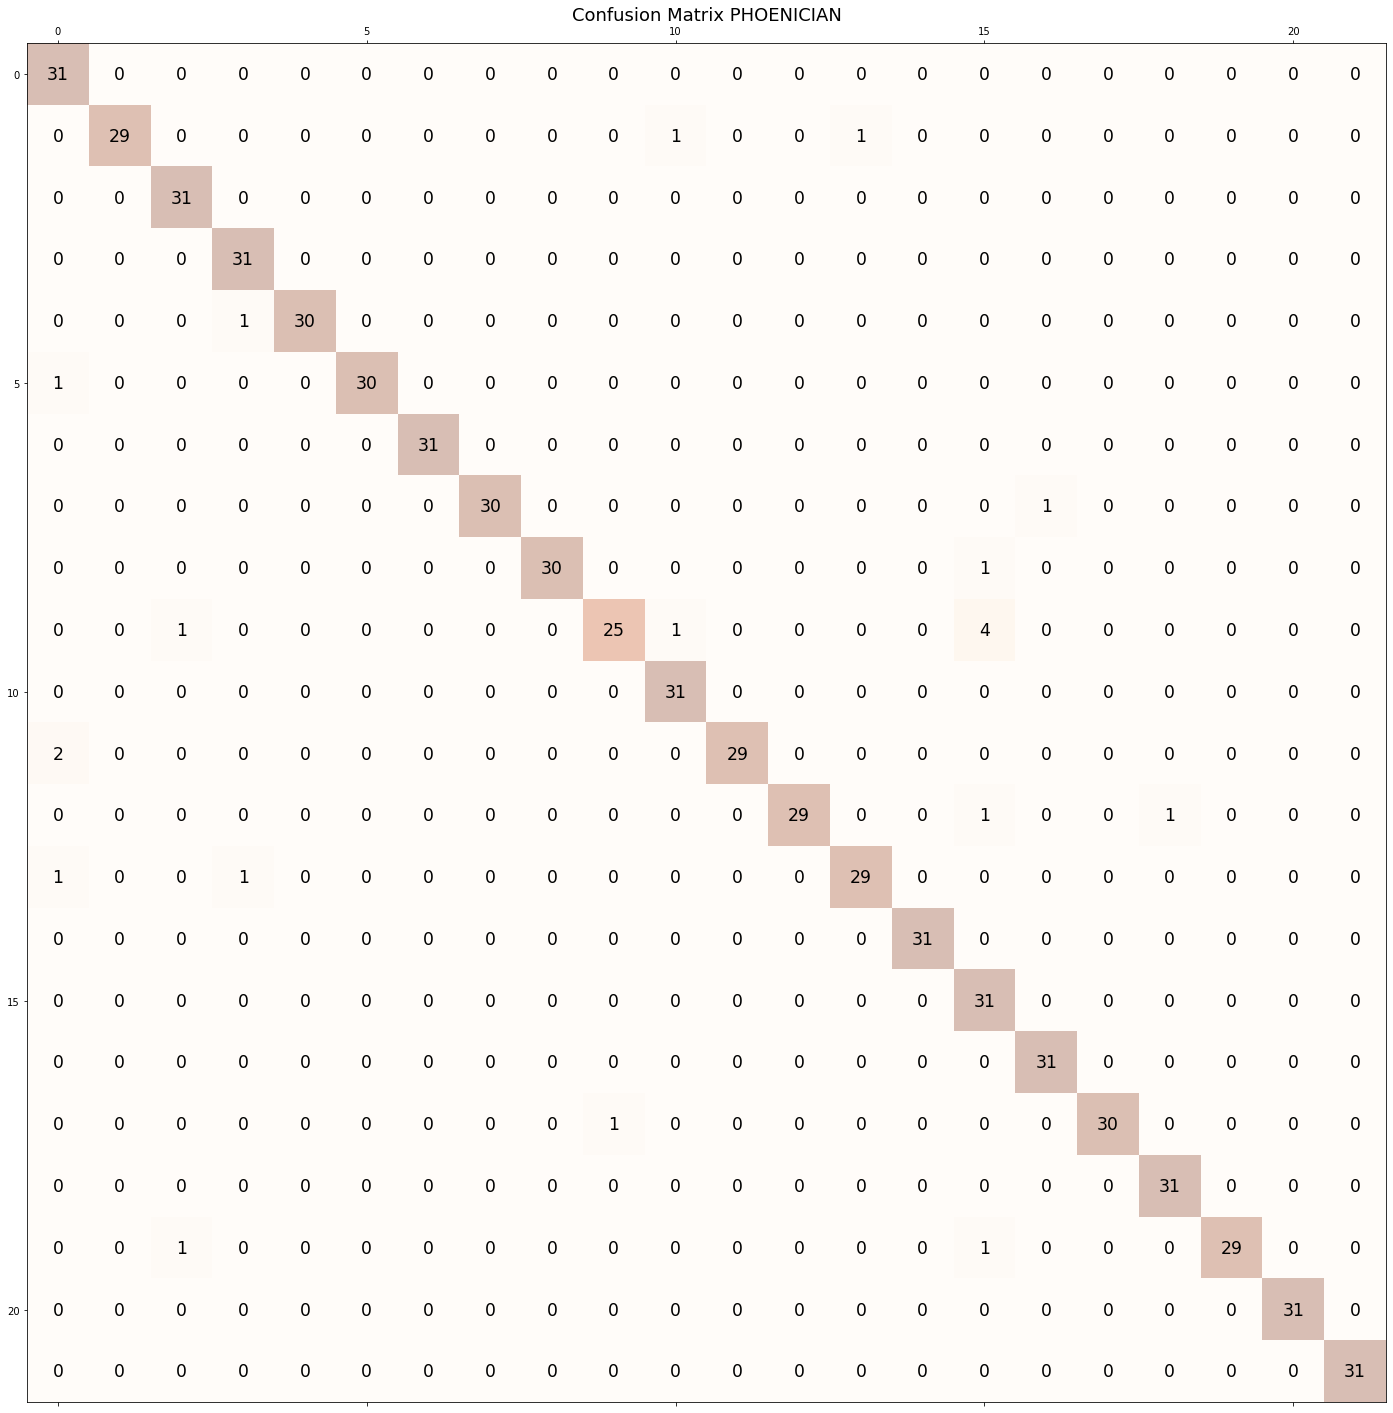

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(25, 25))
conf_matrix = confusion_matrix(y, y_pred)
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
# plt.xlabel('Predictions', fontsize=18)
# plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix PHOENICIAN', fontsize=18)
plt.show()